In [23]:
import pandas as pd
import numpy as np

In [24]:
# Loading Cleaned Dataset
df = pd.read_csv("..\data\cleaned_dataset.csv")

In [25]:
df_copy = df.copy()

In [26]:
# Checking for missing values
missing_values = df_copy.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Observation:
- The dataset does not have any missing values.

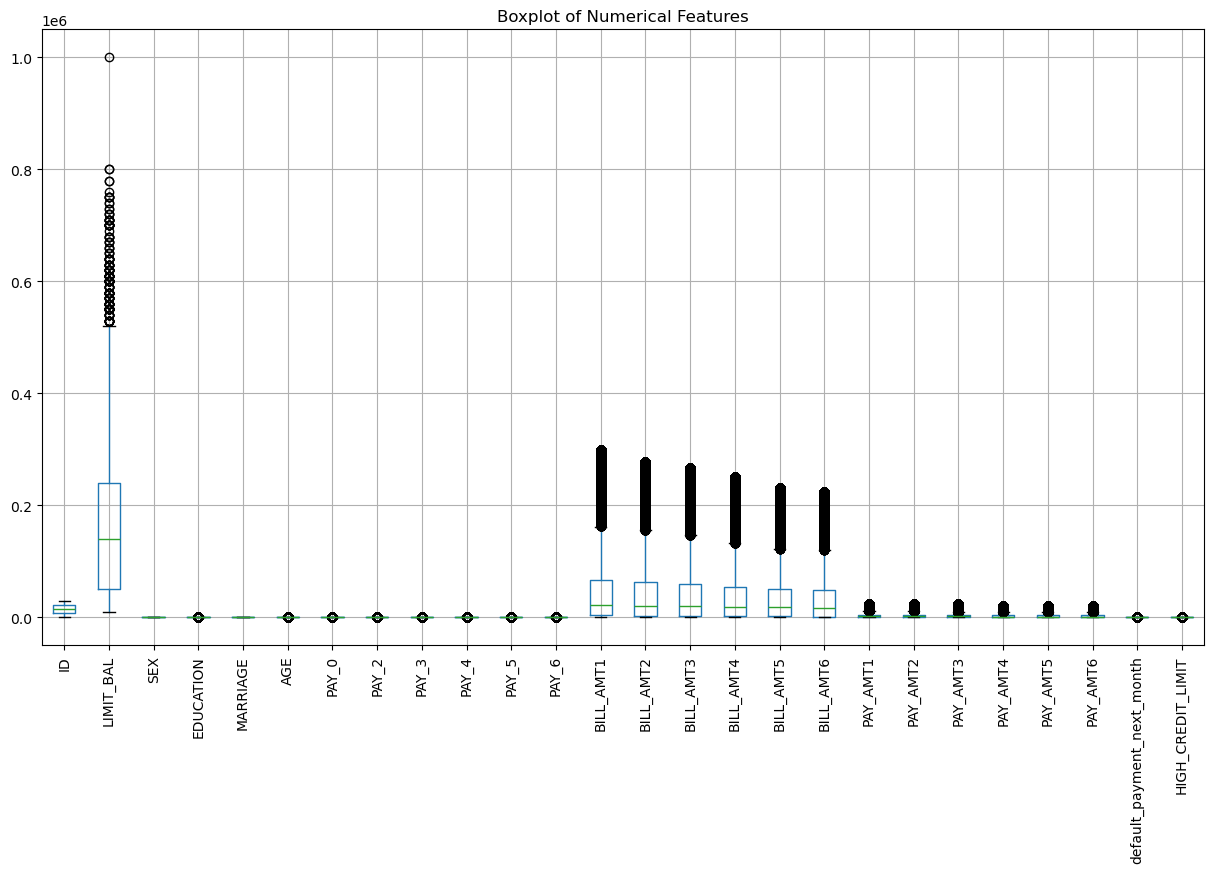

In [27]:
# Handling Outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the numerical columns
num_cols = df_copy.select_dtypes(include = [np.number]).columns.tolist()

# Boxplots for all numerical columns
plt.figure(figsize = (15, 8))
df_copy[num_cols].boxplot(rot = 90)
plt.title("Boxplot of Numerical Features")
plt.show()

Observations:
- Already handled outliers in `LIMIT_BAL` by applying IQR and creating a new column `HIGH_CREDIT_LIMIT` to flag high-limit(> 525000.0) customers instead of removing them (Refer 01_data_cleaning.ipynb file)
- Also handled outliers for `BILL_AMT` columns using IQR within the LIMIT_BAL_GROUP (Refer 01_data_cleaning.ipynb file)
- Payment amounts have extreme values, we need to cap them by Winsorization

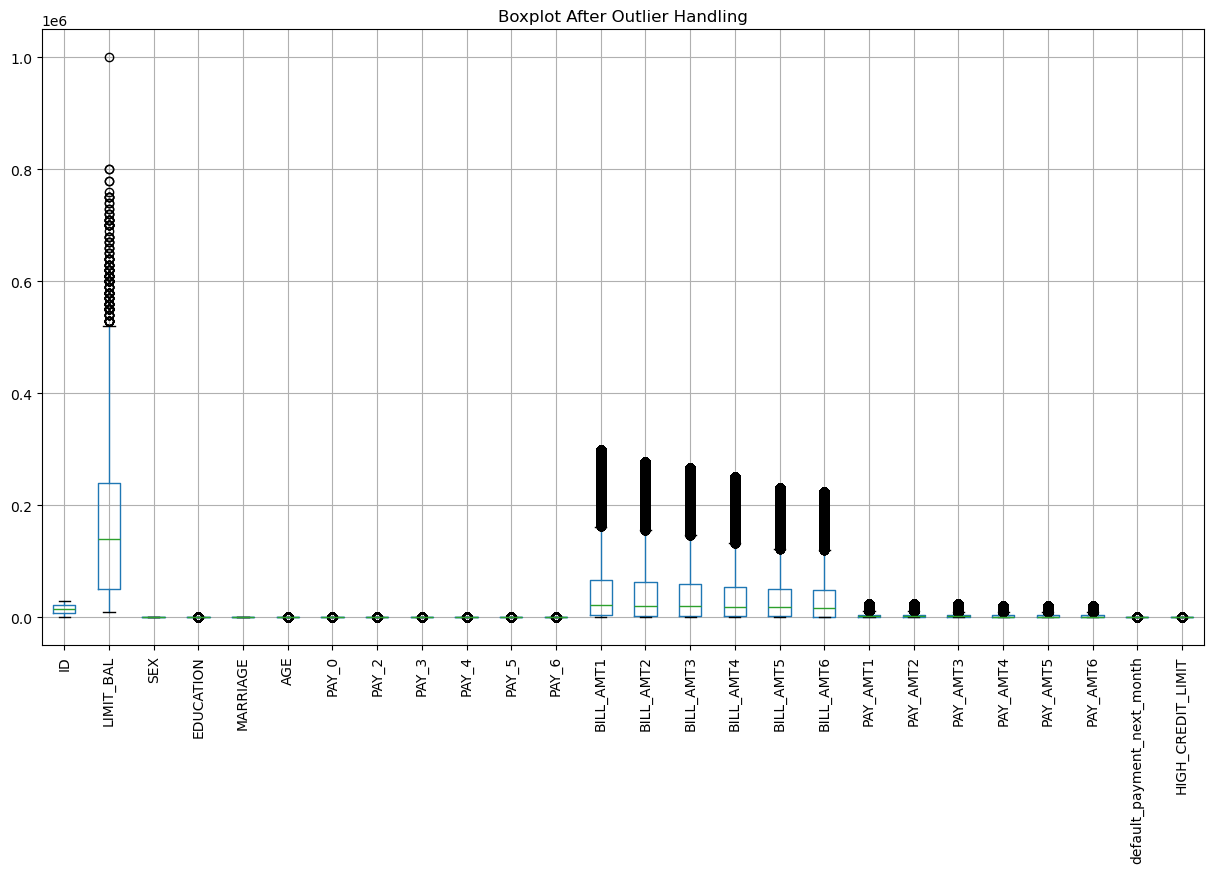

In [28]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

# Winsorization for PAY_AMT columns
pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
for col in pay_amt_cols:
    df_copy[col] = winsorize(df_copy[col], limits = [0.01, 0.01])

# Boxplot after handling outliers
plt.figure(figsize = (15, 8))
df_copy[num_cols].boxplot(rot = 90)
plt.title("Boxplot After Outlier Handling")
plt.show()

In [29]:
import pandas as pd

# Original statistics (Before Winsorization)
print("Before Winsorization:\n")
print(df_copy[pay_amt_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

# Apply Winsorization (Capping 1% of extreme values)
for col in pay_amt_cols:
    df_copy[col] = winsorize(df_copy[col], limits=[0.01, 0.01])

# After Winsorization
print("\nAfter Winsorization:\n")
print(df_copy[pay_amt_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

Before Winsorization:

           PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean    3859.280722   3772.306852   3360.116550   3002.108195   2998.365054   
std     4773.183234   4794.732708   4560.916823   4149.837434   4080.806752   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1000.000000    833.000000    390.000000    296.000000    252.000000   
50%     2100.000000   2009.000000   1800.000000   1500.000000   1500.000000   
75%     5000.000000   4925.500000   4174.125000   3826.000000   3900.000000   
99%    23604.125000  23650.000000  23075.750000  20665.000000  19815.250000   
max    23604.125000  23650.000000  23075.750000  20665.000000  19815.250000   

           PAY_AMT6  
count  29999.000000  
mean    3022.179856  
std     4277.368256  
min        0.000000

Observations:
- Before Winsorization: 99% = max values for all coulmns
- After Winsorization: thmax values still the same, Winsorization didn't cap anything

In [30]:
# Applying higher Winsorization limit to 5%

import pandas as pd

# Original statistics (Before Winsorization)
print("Before Winsorization:\n")
print(df_copy[pay_amt_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

# Apply Winsorization (Capping 5% of extreme values)
for col in pay_amt_cols:
    df_copy[col] = winsorize(df_copy[col], limits=[0.05, 0.05])

# After Winsorization
print("\nAfter Winsorization:\n")
print(df_copy[pay_amt_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

Before Winsorization:

           PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5  \
count  29999.000000  29999.000000  29999.000000  29999.000000  29999.000000   
mean    3859.280722   3772.306852   3360.116550   3002.108195   2998.365054   
std     4773.183234   4794.732708   4560.916823   4149.837434   4080.806752   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
25%     1000.000000    833.000000    390.000000    296.000000    252.000000   
50%     2100.000000   2009.000000   1800.000000   1500.000000   1500.000000   
75%     5000.000000   4925.500000   4174.125000   3826.000000   3900.000000   
99%    23604.125000  23650.000000  23075.750000  20665.000000  19815.250000   
max    23604.125000  23650.000000  23075.750000  20665.000000  19815.250000   

           PAY_AMT6  
count  29999.000000  
mean    3022.179856  
std     4277.368256  
min        0.000000

Observations:
- After winsorization(5%) the 99% is 15071 and max is capped at 15071. Similar reductions happened for all `PAY_AMT` columns. The extreme high values were capped at the 95th percentile
- The 'mean' and 'standard deviation' dropped significantly. No changes in the 'Lower' percentiles

In [31]:
import pandas as pd

# Step 1: One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df_copy, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

# Step 2: Create a separate copy for Label Encoding
df_label_encoded = df_encoded.copy()  

# Define the correct mapping for PAY_0 to PAY_6
pay_mapping = {-2: 0, -1: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 8, 7: 9, 8: 10}
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Apply mapping safely using .replace() to prevent unintended modifications
df_label_encoded[pay_cols] = df_label_encoded[pay_cols].replace(pay_mapping)

# Fill NaNs if any exist (replace with -1 or any valid default value)
df_label_encoded[pay_cols] = df_label_encoded[pay_cols].fillna(-1)

# Convert to integer for consistency
df_label_encoded[pay_cols] = df_label_encoded[pay_cols].astype(int)

# Print results
print(df_label_encoded[pay_cols].head())

   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      4      4      1      1      0      0
1      1      4      2      2      2      4
2      2      2      2      2      2      2
3      2      2      2      2      2      2
4      1      2      1      2      2      2


In [32]:
print(df_label_encoded.head().T)  # Transpose to see all column names

                                           0                    1  \
ID                                         1                    2   
LIMIT_BAL                              20000               120000   
AGE                                       24                   26   
PAY_0                                      4                    1   
PAY_2                                      4                    4   
PAY_3                                      1                    2   
PAY_4                                      1                    2   
PAY_5                                      0                    2   
PAY_6                                      0                    4   
BILL_AMT1                               3913                 2682   
BILL_AMT2                               3102                 1725   
BILL_AMT3                                689                 2682   
BILL_AMT4                                  0                 3272   
BILL_AMT5                         

In [33]:
# Scaling numerical columns using StandardScaler
from sklearn.preprocessing import StandardScaler

# Selecting the numerical columns to scale
numeric_cols = ['LIMIT_BAL', 'AGE',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Initializing standard scaler
scaler = StandardScaler()

# fit and transform only numerical columns
df_label_encoded[numeric_cols] = scaler.fit_transform(df_label_encoded[numeric_cols])

print(df_label_encoded[numeric_cols].describe().T)

             count          mean       std       min       25%       50%  \
LIMIT_BAL  29999.0 -5.116078e-17  1.000017 -1.213793 -0.905480 -0.211775   
AGE        29999.0 -4.926594e-17  1.000017 -1.571879 -0.812205 -0.161056   
BILL_AMT1  29999.0  2.510668e-17  1.000017 -0.747788 -0.694196 -0.410724   
BILL_AMT2  29999.0 -5.116078e-17  1.000017 -0.749559 -0.702415 -0.414725   
BILL_AMT3  29999.0 -1.894844e-17  1.000017 -0.743434 -0.699637 -0.413368   
BILL_AMT4  29999.0  1.136906e-17  1.000017 -0.734841 -0.693753 -0.398364   
BILL_AMT5  29999.0 -3.458090e-17  1.000017 -0.727322 -0.694167 -0.386858   
BILL_AMT6  29999.0  2.368555e-19  1.000017 -0.717780 -0.693602 -0.389229   
PAY_AMT1   29999.0  5.163449e-17  1.000017 -0.908108 -0.658213 -0.383328   
PAY_AMT2   29999.0 -7.010922e-17  1.000017 -0.890877 -0.680794 -0.384206   
PAY_AMT3   29999.0 -1.326391e-17  1.000017 -0.845508 -0.739500 -0.356239   
PAY_AMT4   29999.0 -5.684531e-17  1.000017 -0.826006 -0.738020 -0.380130   
PAY_AMT5   2

Observations:
- Mean value is ~0
- Standard Deviation(std) is ~1
- Min and Max values have been transformed into a standard normal distribution range

In [34]:
# Checking if there are any non-numeric columns
non_numeric_cols = df_label_encoded.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['CREDIT_LIMIT_CATEGORY', 'LIMIT_BAL_GROUP', 'PAY_AMT_GROUP',
       'PAY_AMT1_GROUP', 'PAY_AMT2_GROUP', 'PAY_AMT3_GROUP', 'PAY_AMT4_GROUP',
       'PAY_AMT5_GROUP', 'PAY_AMT6_GROUP', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')


In [35]:
# Replacing all categorical values with numeric codes
for col in non_numeric_cols:
    df_label_encoded[col] = df_label_encoded[col].astype('category').cat.codes

Highly correlated features to consider dropping: {'LIMIT_BAL_GROUP', 'BILL_AMT3', 'BILL_AMT6', 'PAY_AMT1_GROUP', 'MARRIAGE_2', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5'}


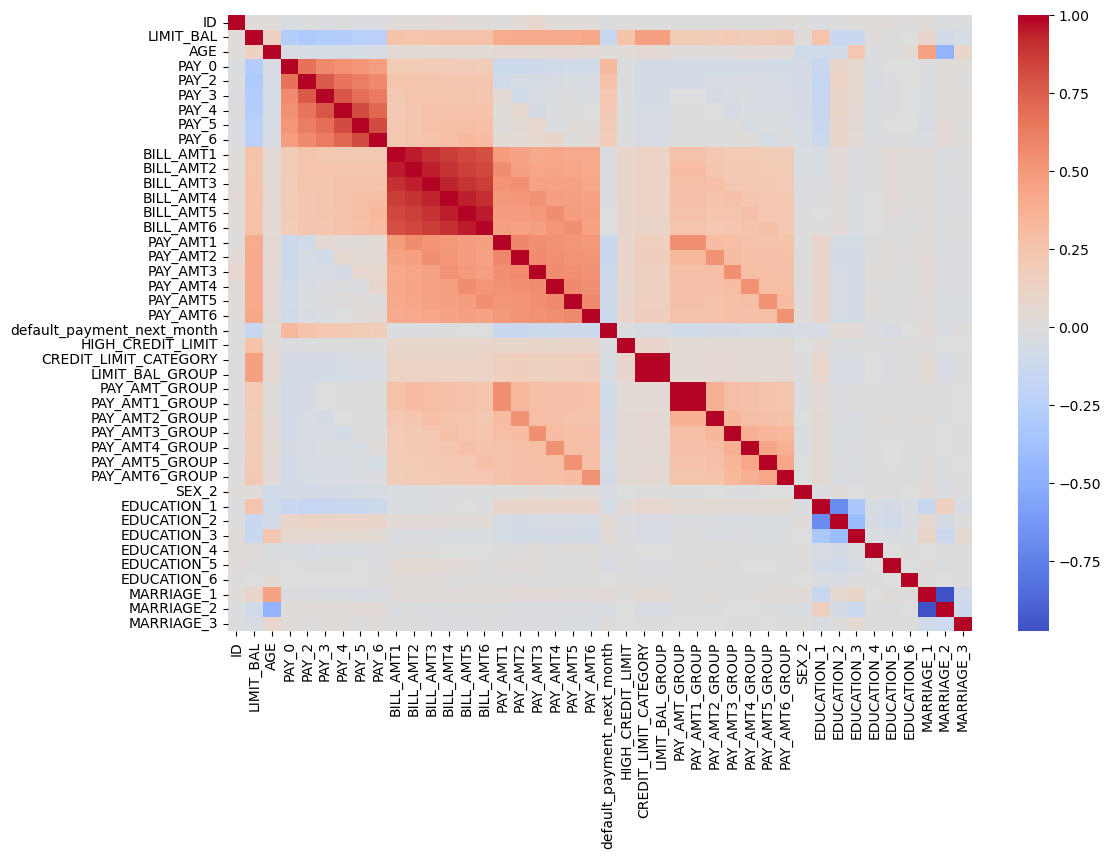

In [36]:
# Checking for the Feature Correlation and removing highly correlated feature

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# compute the correlation matrix
corr_matrix = df_label_encoded.corr()

# Plotting Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)

# Finding highly correlated features
threshold = 0.85
high_corr_vars = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

print("Highly correlated features to consider dropping:", high_corr_vars)

Observations:
- BILL_AMT Columns → BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 are highly correlated
- PAY_AMT1_GROUP → Likely correlated with other PAY_AMT_GROUP variables
- MARRIAGE_2 → Possibly redundant due to one-hot encoding
- LIMIT_BAL_GROUP → Could be highly correlated with LIMIT_BAL

- Before dropping the `BILL_AMT` column, checking how much each `BILL_AMT` column is correlated with the `default_payment_next_month`
- If the `BILL_AMT` is strongly correlated then we keep them

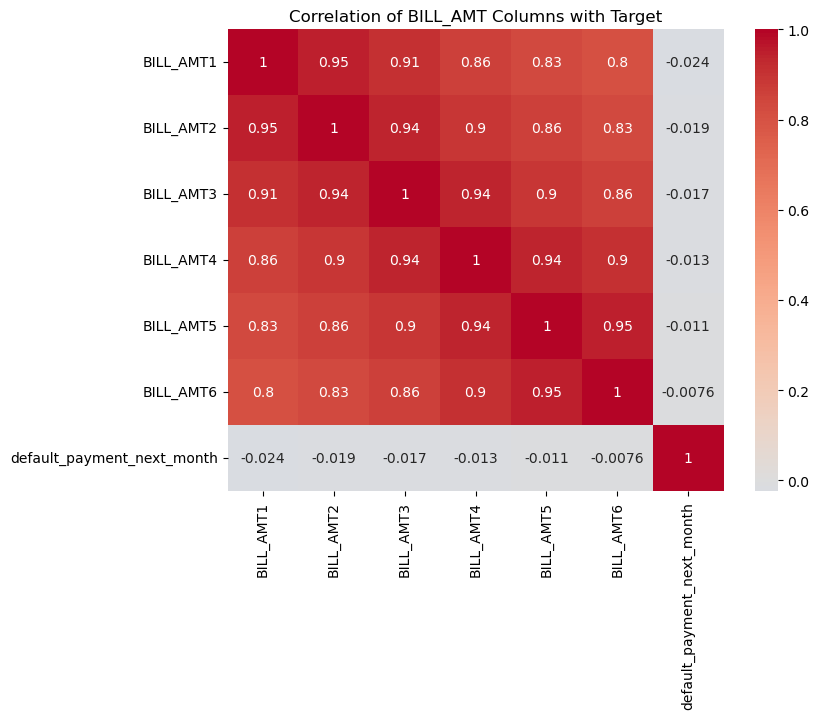

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for correlation of BILL_AMT columns with the target
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
corr_with_target = df_label_encoded[bill_cols + ['default_payment_next_month']].corr()

# Visualizing the correlation with target
plt.figure(figsize = (8, 6))
sns.heatmap(corr_with_target, annot = True, cmap = "coolwarm", center = 0)
plt.title("Correlation of BILL_AMT Columns with Target")
plt.show()

Observations:
- `BILL_AMT1 to BILL_AMT6` are strongly correlated with each other (>= 0.8 to 0.95)
- These features are redundant as they represents the same spending behavior over time
- Correlation values of `BILL_AMT1 to BILL_AMT6` with `default_payment_next_month` are all very close to zero, around -0.02 to -0.0076

Action:
- BILL_AMT columns have both high collinearity & weak correlation with default payment. Instead of removing them, creatig aggregate features to retain useful information without redundancy

In [38]:
# Creating aggregate features

df_copy['BILL_MEAN'] = df_copy[bill_cols].mean(axis = 1)
df_copy['BILL_STD'] = df_copy[bill_cols].std(axis = 1)
df_copy['BILL_TREND'] = df_copy[bill_cols].iloc[:, 0] - df_copy[bill_cols].iloc[:, -1]
df_copy.drop(columns = bill_cols, inplace = True)

In [39]:
df_copy_original = df_copy.copy()

In [40]:
# Comparing the model performace with and without `BILL_AMT`

# Baseline Model: Using original BILL_AMT columns
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
X_baseline = df_copy_original.drop(columns=['default_payment_next_month'])  # Original dataset before aggregation

In [41]:
# Engineered Model: Using aggregated BILL features
X_engineered = df_copy.drop(columns=['default_payment_next_month'])  # Dataset after feature engineering

In [42]:
print(X_baseline.dtypes)
print(X_engineered.dtypes)

ID                         int64
LIMIT_BAL                  int64
SEX                        int64
EDUCATION                  int64
MARRIAGE                   int64
AGE                        int64
PAY_0                      int64
PAY_2                      int64
PAY_3                      int64
PAY_4                      int64
PAY_5                      int64
PAY_6                      int64
PAY_AMT1                 float64
PAY_AMT2                 float64
PAY_AMT3                 float64
PAY_AMT4                 float64
PAY_AMT5                 float64
PAY_AMT6                 float64
HIGH_CREDIT_LIMIT          int64
CREDIT_LIMIT_CATEGORY     object
LIMIT_BAL_GROUP           object
PAY_AMT_GROUP             object
PAY_AMT1_GROUP            object
PAY_AMT2_GROUP            object
PAY_AMT3_GROUP            object
PAY_AMT4_GROUP            object
PAY_AMT5_GROUP            object
PAY_AMT6_GROUP            object
BILL_MEAN                float64
BILL_STD                 float64
BILL_TREND

In [43]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding (if only a few categories)
le = LabelEncoder()
X_baseline['credit_limit_category'] = le.fit_transform(X_baseline['CREDIT_LIMIT_CATEGORY'])
X_engineered['credit_limit_category'] = le.transform(X_engineered['CREDIT_LIMIT_CATEGORY'])  # Ensure consistency

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Drop remaining non-numeric columns if necessary
X_baseline = X_baseline.select_dtypes(include=[np.number])
X_engineered = X_engineered.select_dtypes(include=[np.number])

y = df_copy['default_payment_next_month'].copy()

# Train-Test Split (Ensure Same y for Both)
X_train_b, X_test_b, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)
X_train_e, X_test_e, _, _ = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit-transform training data and transform test data
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)
X_train_e = scaler.fit_transform(X_train_e)
X_test_e = scaler.transform(X_test_e)

# Model 1: Using Original BILL_AMT Columns
model_b = LogisticRegression(max_iter=1000, solver='saga')
model_b.fit(X_train_b, y_train)
y_pred_b = model_b.predict(X_test_b)

# Model 2: Using Aggregated BILL Features
model_e = LogisticRegression(max_iter=1000, solver='saga')
model_e.fit(X_train_e, y_train)
y_pred_e = model_e.predict(X_test_e)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n **{model_name} Performance**")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")

# Compare Model Performances
evaluate_model(y_test, y_pred_b, "Baseline Model (Original BILL_AMT)")
evaluate_model(y_test, y_pred_e, "Engineered Model (Aggregated BILL Features)")


 **Baseline Model (Original BILL_AMT) Performance**
Accuracy: 0.8060
Precision: 0.6942
Recall: 0.2324
F1 Score: 0.3483

 **Engineered Model (Aggregated BILL Features) Performance**
Accuracy: 0.8060
Precision: 0.6942
Recall: 0.2324
F1 Score: 0.3483


Observations:
- Both models (Baseline & Engineered) have the same accuracy, precision, recall and F1 Score. So aggregating `BILL_AMT` features(mean, std, trend) did not impact model's performance
- Also model struggles to identify defaulters correctly. High precision is 69% but low recall is 23% this suggests the model is better at predicting non-defaulters but misses actual defaulters

In [47]:
# Checking the features importance which helps in model performance
import pandas as pd
feature_importance = pd.DataFrame(
    {'Feature': X_engineered.columns, 'Coefficient': model_e.coef_[0]}
).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                  Feature  Coefficient
6                   PAY_0     0.593885
19              BILL_MEAN     0.158710
8                   PAY_3     0.097584
7                   PAY_2     0.084836
5                     AGE     0.076753
10                  PAY_5     0.064730
9                   PAY_4     0.045918
22  credit_limit_category     0.008641
0                      ID     0.006104
11                  PAY_6     0.001931
18      HIGH_CREDIT_LIMIT     0.000118
1               LIMIT_BAL    -0.013457
2                     SEX    -0.051246
16               PAY_AMT5    -0.063109
15               PAY_AMT4    -0.064585
20               BILL_STD    -0.065029
4                MARRIAGE    -0.075186
21             BILL_TREND    -0.081897
3               EDUCATION    -0.097796
17               PAY_AMT6    -0.102608
14               PAY_AMT3    -0.122289
13               PAY_AMT2    -0.156563
12               PAY_AMT1    -0.158892


Observations:
- Most important features are:
    - PAY_0 (0.59) with the highest coefficient
    - BILL_MEAN (0.15) aggregation had some impact
- BILL_STD (-0.065), BILL_TREND(-0.081) May not be helpful for predicting default risk
- credit_limit_category (0.008) also not contributing significantly
- PAY_AMT Features Have Negative Coefficients

Action:
- Dropping the low impact features, which may help in model performance

In [48]:
# Dropping the low-impact features

features_to_drop = ['ID', 'credit_limit_category', 'HIGH_CREDIT_LIMIT', 'BILL_STD', 'BILL_TREND']

# Dropping them from the X_engineered
X_engineered_reduced = X_engineered.drop(columns = features_to_drop, errors = 'ignore')

print('Original Shape: ', X_engineered.shape)
print('Reduced Shape: ', X_engineered_reduced.shape)

Original Shape:  (29999, 23)
Reduced Shape:  (29999, 18)


In [49]:
# Splitting the data again scaling it and training for Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Training and testing
X_train_e_red, X_test_e_red, y_train, y_test = train_test_split(X_engineered_reduced, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train_e_red_scaled = pd.DataFrame(scaler.fit_transform(X_train_e_red), columns = X_train_e_red.columns)
X_test_e_red_scaled = pd.DataFrame(scaler.transform(X_test_e_red), columns = X_test_e_red.columns)

# Train Logistic Regression
model_e_red = LogisticRegression(max_iter=5000, solver='saga')
model_e_red.fit(X_train_e_red_scaled, y_train)

# Predictions
y_pred_e_red = model_e_red.predict(X_test_e_red_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_e_red)
precision = precision_score(y_test, y_pred_e_red)
recall = recall_score(y_test, y_pred_e_red)
f1 = f1_score(y_test, y_pred_e_red)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8068
Precision: 0.7029
Recall: 0.2317
F1 Score: 0.3485


Observations:
- The recall is 23% same as the original model. Means the model is missing too many actual defaulters

Action:
- Applying SMOTE(Synthetic Minority Over-Sampling Technique) to improve the recall

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Training and testing data
X_train_e_red, X_test_e_red, y_train, y_test = train_test_split(X_engineered_reduced, y, test_size = 0.2, random_state = 42, stratify = y)

# Applying SMOTE only to the training set
smote = SMOTE(random_state = 42, sampling_strategy = 1.0)
X_train_e_red_smote, y_train_smote = smote.fit_resample(X_train_e_red, y_train)

# Scaling Data
scaler = StandardScaler()
X_train_e_red_scaled = pd.DataFrame(scaler.fit_transform(X_train_e_red_smote), columns = X_train_e_red.columns)
X_test_e_red_scaled = pd.DataFrame(scaler.transform(X_test_e_red), columns = X_test_e_red.columns)

# Train logistic regression
model_e_red_smote = LogisticRegression(max_iter = 5000, solver = 'saga')
model_e_red_smote.fit(X_train_e_red_scaled, y_train_smote)

# Predictions
y_pred_e_red_smote = model_e_red_smote.predict(X_test_e_red_scaled)

# Evaluating Metrics
accuracy = accuracy_score(y_test, y_pred_e_red_smote)
precision = precision_score(y_test, y_pred_e_red_smote)
recall = recall_score(y_test, y_pred_e_red_smote)
f1 = f1_score(y_test, y_pred_e_red_smote)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.6852
Precision: 0.3689
Recall: 0.5961
F1 Score: 0.4558


Observations:
- Before SMOTE → Recall: 0.2317, After SMOTE → Recall: 0.5961
- SMOTE Balanced the dataset giving the model more exposure to minority. Now it catches more defaulters improving recall significantly

In [51]:
# Boosting precision while keeping the recall on the same
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Training and testing data
X_train_e_red, X_test_e_red, y_train, y_test = train_test_split(X_engineered_reduced, y, test_size = 0.2, random_state = 42, stratify = y)

# Trying different sampling strategies
for strategy in [0.7, 0.8, 0.9]:
    print(f'Testing SMOTE with sampling_strategy = {strategy}')

    # Applying SMOTE
    smote = SMOTE(random_state = 42, sampling_strategy = strategy)
    X_train_e_red_smote, y_train_smote = smote.fit_resample(X_train_e_red, y_train)

    # Scaling Data
    scaler = StandardScaler()
    X_train_e_red_scaled = pd.DataFrame(scaler.fit_transform(X_train_e_red_smote), columns = X_train_e_red.columns)
    X_test_e_red_scaled = pd.DataFrame(scaler.transform(X_test_e_red), columns = X_test_e_red.columns)

    # Training Logistic Regression
    model = LogisticRegression(max_iter = 5000, solver = 'saga')
    model.fit(X_train_e_red_scaled, y_train_smote)

    #Predictions
    y_pred = model.predict(X_test_e_red_scaled)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

Testing SMOTE with sampling_strategy = 0.7
Accuracy: 0.7457
Precision: 0.4335
Recall: 0.4891
F1 Score: 0.4596
Testing SMOTE with sampling_strategy = 0.8
Accuracy: 0.7268
Precision: 0.4088
Recall: 0.5268
F1 Score: 0.4603
Testing SMOTE with sampling_strategy = 0.9
Accuracy: 0.7033
Precision: 0.3839
Recall: 0.5644
F1 Score: 0.4570


In [ ]:
# Savig both preprocessed features (X) and labels (y) separately for easy access

import pandas as pd

# Save X_train, X_test, y_train, y_test
X_train_e_red.to_csv("..\data\preprocessed dataset\X_train.csv", index=False)
X_test_e_red.to_csv("..\data\preprocessed dataset\X_test.csv", index=False)
y_train.to_csv("..\data\preprocessed dataset\y_train.csv", index=False)
y_test.to_csv("..\data\preprocessed dataset\y_test.csv", index=False)

# Save SMOTE-applied data
X_train_e_red_smote.to_csv("..\data\preprocessed dataset\X_train_smote.csv", index=False)
y_train_smote.to_csv("..\data\preprocessed dataset\y_train_smote.csv", index=False)

print("Processed datasets saved successfully!")

Processed datasets saved successfully!


In [ ]:
# Saving the fitted StandardScaler and SMOTE object to ensure consistency when making predictions later

import joblib

# Save the scaler
joblib.dump(scaler, "..\models\scaler.pkl")

# Save SMOTE object
joblib.dump(smote, "..\models\smote.pkl")

print("Scaler and SMOTE objects saved!")

Scaler and SMOTE objects saved!
